# Clasificación por área
Cargamos el archivo "laborum.json" y posteriormente se procesó para juntar todas las ofertas que pertenecían a un área específica.

In [2]:
import json
from collections import defaultdict

# 1. Cargar el archivo JSON
with open('laborum.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 2. Crear un diccionario para agrupar por 'area'
areas_dict = defaultdict(list)

# 3. Recorrer las ofertas y agruparlas por el campo 'area'
for oferta in data:
    area = oferta.get('area', 'Sin especificar')  # Maneja el caso de áreas faltantes
    areas_dict[area].append(oferta)

# 4. Mostrar un resumen de las áreas y el número de ofertas
for area, ofertas in areas_dict.items():
    print(f"Área: {area}, Número de ofertas: {len(ofertas)}")

Área: Ventas, Número de ofertas: 192
Área: Desarrollo de Negocios, Número de ofertas: 14
Área: Instrumentación Minera, Número de ofertas: 4
Área: Ingeniería  Eléctrica y Electrónica, Número de ofertas: 8
Área: Otros, Número de ofertas: 56
Área: Secretaria, Número de ofertas: 6
Área: Comercial, Número de ofertas: 105
Área: Almacén / Depósito / Expedición, Número de ofertas: 27
Área: Contabilidad, Número de ofertas: 65
Área: Mineria/Petroleo/Gas, Número de ofertas: 10
Área: Programación de producción, Número de ofertas: 4
Área: Trabajo social, Número de ofertas: 4
Área: Capacitación, Número de ofertas: 6
Área: Programación, Número de ofertas: 14
Área: Logística, Número de ofertas: 36
Área: Mantenimiento, Número de ofertas: 27
Área: Servicios, Número de ofertas: 11
Área: Abastecimiento, Número de ofertas: 20
Área: Ingeniería  Industrial, Número de ofertas: 6
Área: Créditos y Cobranzas, Número de ofertas: 11
Área: Tecnologia / Sistemas, Número de ofertas: 13
Área: Otras áreas técnicas en s

# 20 Áreas con mayor demanda
Una vez se clasificaron las áreas, se extrayeron la cantidad de ofertas por cada una y se seleccionaron las 20 con más ofertas.

In [3]:
top_20 = sorted(areas_dict.items(), key=lambda x: len(x[1]), reverse=True)[:20]

for area, ofertas in top_20:
    print(f"Área: {area}, Número de ofertas: {len(ofertas)}")

Área: Ventas, Número de ofertas: 192
Área: Comercial, Número de ofertas: 105
Área: Contabilidad, Número de ofertas: 65
Área: Otros, Número de ofertas: 56
Área: Atención al Cliente, Número de ofertas: 47
Área: Administración, Número de ofertas: 46
Área: Logística, Número de ofertas: 36
Área: Gastronomia, Número de ofertas: 35
Área: Call Center, Número de ofertas: 33
Área: Construcción, Número de ofertas: 32
Área: Producción, Número de ofertas: 32
Área: Recursos Humanos, Número de ofertas: 31
Área: Almacén / Depósito / Expedición, Número de ofertas: 27
Área: Mantenimiento, Número de ofertas: 27
Área: Calidad, Número de ofertas: 21
Área: Abastecimiento, Número de ofertas: 20
Área: Educación/Docencia, Número de ofertas: 20
Área: Otras Ingenierias, Número de ofertas: 18
Área: Oficios y Profesiones, Número de ofertas: 17
Área: Seguridad, Número de ofertas: 17


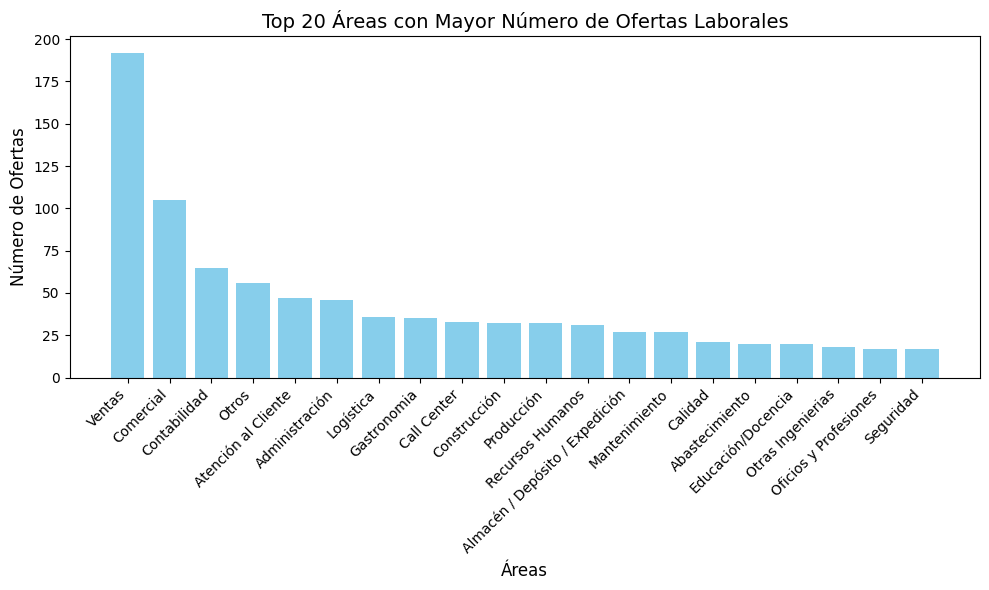

In [4]:
import matplotlib.pyplot as plt

top_20_dict = dict(top_20)
areas = list(top_20_dict.keys())
num_ofertas = [len(ofertas) for ofertas in top_20_dict.values()]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(areas, num_ofertas, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Áreas', fontsize=12)
plt.ylabel('Número de Ofertas', fontsize=12)
plt.title('Top 20 Áreas con Mayor Número de Ofertas Laborales', fontsize=14)

# Rotar etiquetas del eje X para que no se solapen
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()  # Ajustar el diseño para evitar que se corten etiquetas
plt.show()

# Obtención de habilidades clave en cada sector
En esta etapa, se proceso la descripción de ofertas de trabajo de cada sector para obtener cuales son las habilidades clave respectivas. 

In [6]:
import re
import spacy

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\b\d+\b', '', texto)  # Quitar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar caracteres especiales
    texto = re.sub(r'\s+', ' ', texto).strip()  # Quitar espacios extras
    return texto

nlp = spacy.load('es_core_news_md')

def extraer_habilidades_ner(texto):
    doc = nlp(texto)
    habilidades = [ent.text for ent in doc.ents if ent.label_ == "MISC"]
    return habilidades

areas_habilidades = {}

for area, ofertas in areas_dict.items():
    descripciones = " ".join([oferta.get('jobDescription', '') for oferta in ofertas])
    texto_limpio = limpiar_texto(descripciones)
    habilidades = extraer_habilidades_ner(texto_limpio)
    habilidades_unicas = list(set(habilidades))
    areas_habilidades[area] = habilidades_unicas

areas_habilidades

{'Ventas': ['full time hrs',
  'gestiónpresencialventasfulltime',
  'saludpresencialventasfulltime',
  'outlook excel intermedioaplicaciones',
  'ventaspresencialventasfulltime',
  'kpi',
  'b2c',
  'microsoft word',
  'pto montt presencialventasfulltimesenior',
  'temporaljunior50',
  'internet',
  'laboralhíbridoventasfulltime',
  'kam movilización',
  'talbot hotels',
  'office',
  'great place to work',
  'resultadospresencialventasfulltime',
  'kam serás',
  'terrenolugar',
  'procesosi te interesa',
  'capacitaciónpresencialventasparttimejunior1',
  'full timerequisitos',
  'solicitudpresencialventasfulltime',
  'temporaljunior15',
  'equipote',
  'proyectoremotoventasparttime',
  'tok2',
  'ms office',
  'mesapresencialventasfulltime',
  'plan de marketingresolver',
  'call center',
  'parttime',
  'hibridohíbridoventasfulltime',
  'microsoft office and fluency in englishpresencialventasfulltime',
  'holiday inn express',
  'facebook',
  'full time horas semanaleste',
  'based i

# Procesamiento de perfiles profesionales
De la carpeta "profiles", se lee un .csv para tomar ejemplos de perfiles, a los cuales se les extrae sus habilidades y pasan por un traductor, debido a que muchos tenían sus habilidades en inglés.

In [9]:
import pandas as pd
from deep_translator import GoogleTranslator
import ast

def translateSkills(skills):
    # Instanciar el traductor
    translator = GoogleTranslator(source='auto', target='es')

    # Traducir todas las frases al español
    frases_traducidas = []
    for frase in skills:
        try:
            traduccion = translator.translate(frase).lower()  # Traduce automáticamente al español
        except Exception as e:
            print(f"Error al traducir '{frase}': {e}")
            frases_traducidas.append(frase.lower())  # Mantener la frase original en caso de error
            continue
        else:
            frases_traducidas.append(traduccion)

    return frases_traducidas

csvProfiles = "gonzalezProfiles"
df = pd.read_csv(f"./profiles/{csvProfiles}.csv")

# Reemplazar NaN con una lista vacía
df['skills'] = df['skills'].fillna('[]')

# Aplicar literal_eval para convertir el string en lista de diccionarios
df['skills'] = df['skills'].apply(ast.literal_eval)

perfiles = []
for skills, first_name, last_name in zip(df["skills"], df["firstName"], df["lastName"]):
    skills_mix = [diccionario['name'] for diccionario in skills]
    perfil = {
        "nombre": first_name + " " + last_name,
        "habilidades": translateSkills(skills_mix)
    }
    perfiles.append(perfil)

names = []
for perfil in perfiles:
    names.append(perfil["nombre"])
    print(perfil["nombre"])

Clemente Gonzalez
Lorena González
Pilar Muñoz González
Carlos González
German Gonzalez
Paulina González
Nadia Xica Gonzalez San Martin
Luis Gonzalez
Patricio Gonzalez
Joaquin Gonzalez Nunez


# Selección de perfil

In [20]:
name = "Joaquin Gonzalez Nunez"

# Diagrama de coincidencias en base a un perfil
Finalmente se compara el nivel de coincidencia de un perfil con cada área respectiva(se seleccionan las más coincidentes) y se genera un diagrama(grafo) que permite saber en base al grosor de la conexión cual es el nivel de coincidencia, donde adicionalmente el tamaño del área indica la cantidad de ofertas laborales correspondientes. 

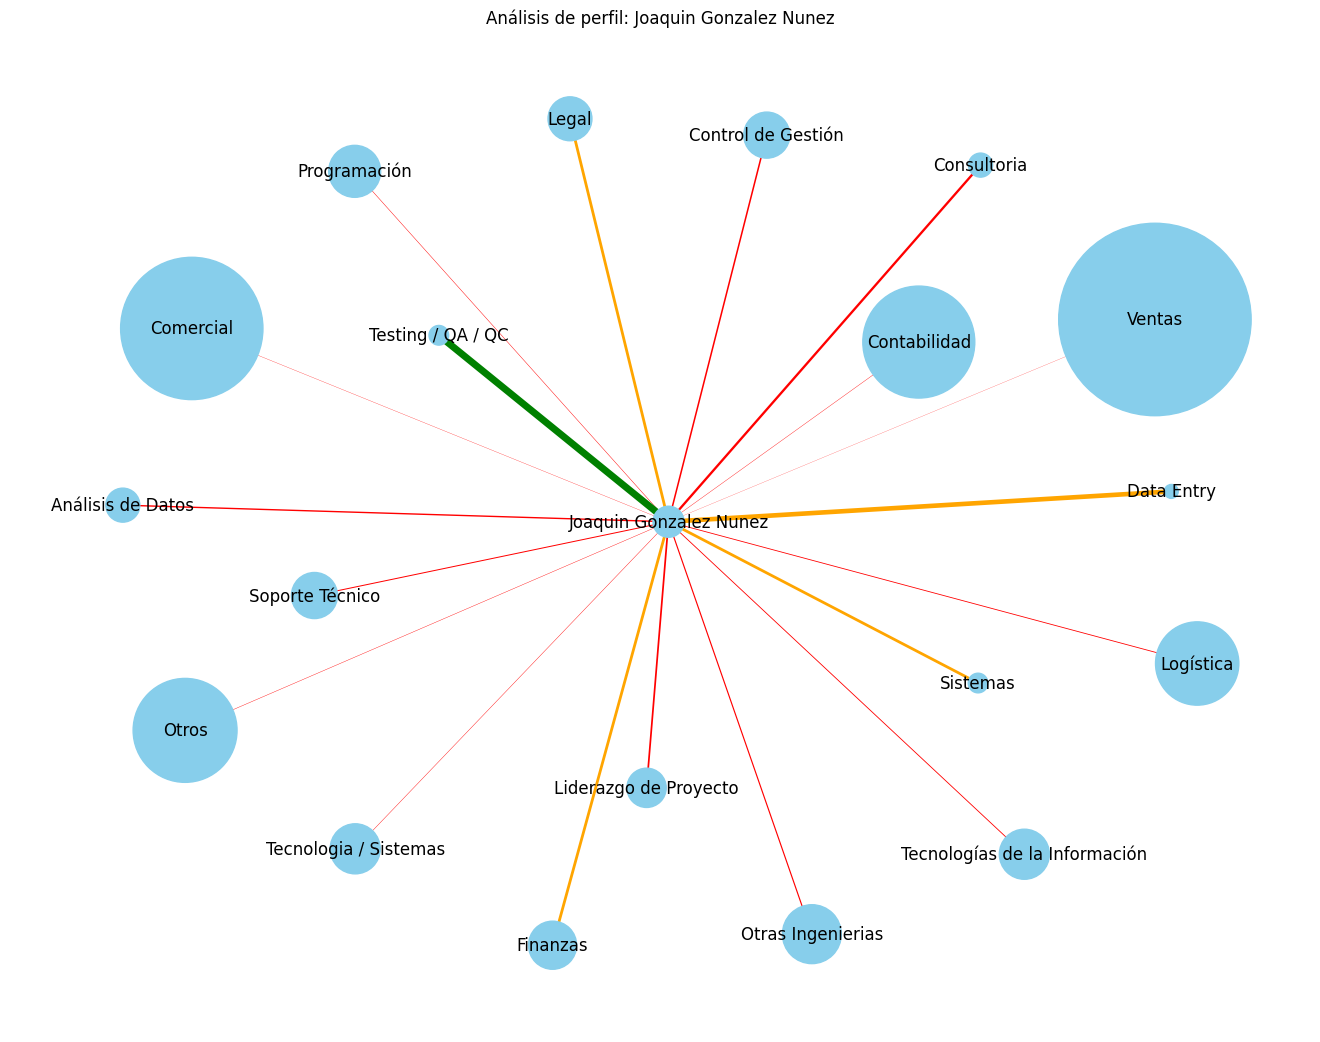

In [21]:
import networkx as nx

G = nx.Graph()

# Búsqueda con lista de comprensión
result = next((item for item in perfiles if item["nombre"] == name), None)

# Agregar el nodo para el perfil
G.add_node(result["nombre"], size=300, type='perfil')

# Función para calcular el porcentaje de coincidencia de habilidades
def calcular_porcentaje_coincidencia(habilidades_perfil, habilidades_area):
    coincidencias = len(set(habilidades_perfil).intersection(habilidades_area))
    if len(habilidades_area) == 0:
        factor_div = 1
    else:
        factor_div = len(habilidades_area)
    return (coincidencias / factor_div) * 100

edges = []
colors = []
widths = []
for area, ofertas in areas_dict.items():
    porcentaje = calcular_porcentaje_coincidencia(result["habilidades"], areas_habilidades[area])
    if porcentaje > 0:
        G.add_node(area, size=len(ofertas), type='area')
        edges.append((result["nombre"], area))
        # Asignar color basado en el porcentaje de coincidencia
        if porcentaje >= 50:
            colors.append('green')  # Alta coincidencia
        elif porcentaje >= 20:
            colors.append('orange')  # Coincidencia media
        else:
            colors.append('red')  # Baja coincidencia
        # Asignar grosor de la arista
        widths.append(porcentaje / 10)

G.add_edges_from(edges)

# Ajustar el tamaño de la figura
plt.figure(figsize=(13, 10))

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)

# Escalar el tamaño de los nodos de las áreas, el perfil tiene un tamaño mayor
sizes = [G.nodes[node]['size'] * 100 if G.nodes[node].get('type') == 'area' else 500 for node in G.nodes]

# Dibujar el grafo con aristas de colores y grosores diferentes
nx.draw(G, pos, with_labels=True, node_size=sizes, font_size=12, node_color='skyblue', edge_color=colors, width=widths)

# Mostrar el gráfico
plt.title(f"Análisis de perfil: {result['nombre']}")
plt.show()